In [71]:
import numpy as np 
import pandas as pd 

#ploting 

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid")

In [72]:
path = '../Data/df2.csv'

In [73]:
df1 = pd.read_csv(path,  parse_dates=['Date'])
df1 = df.rename(columns = {"Date":"ds","Close":"y"}) 
df1

,ds,Open,High,Low,y,tby,ffr,fta,eps,div,une,wti,ppi,rfs
0,2003-01-02,909.03,909.03,879.82,909.03,4.07,1.24,732202.0,40.40,1.79,5.8,31.97,135.3,295248.0
1,2003-01-03,908.59,910.99,903.23,908.59,4.05,1.24,732202.0,40.40,1.79,5.8,33.26,135.3,295248.0
2,2003-01-06,929.01,931.70,908.59,929.01,4.09,1.24,732202.0,40.40,1.79,5.8,32.29,135.3,295248.0
3,2003-01-07,922.93,930.65,919.98,922.93,4.04,1.24,732202.0,40.40,1.79,5.8,31.20,135.3,295248.0
4,2003-01-08,909.93,922.93,908.35,909.93,4.00,1.24,724902.0,40.40,1.79,5.8,30.66,135.3,295248.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285,2020-02-24,3257.61,3259.81,3214.65,3225.89,1.38,1.58,4171570.0,135.28,1.79,3.5,51.36,196.7,525810.0
4286,2020-02-25,3238.94,3246.99,3118.77,3128.21,1.33,1.58,4171570.0,135.28,1.79,3.5,49.78,196.7,525810.0
4287,2020-02-26,3139.90,3182.51,3108.99,3116.39,1.33,1.58,4158637.0,135.28,1.79,3.5,48.67,196.7,525810.0
4288,2020-02-27,3062.54,3097.07,2977.39,2978.76,1.30,1.58,4158637.0,135.28,1.79,3.5,47.17,196.7,525810.0


In [74]:
import datetime as datetime
ctf_date = datetime.datetime(2020, 3, 1)
df = df1.loc[df1.ds < ctf_date , ].copy()
df

,ds,Open,High,Low,y,tby,ffr,fta,eps,div,une,wti,ppi,rfs
0,2003-01-02,909.03,909.03,879.82,909.03,4.07,1.24,732202.0,40.40,1.79,5.8,31.97,135.3,295248.0
1,2003-01-03,908.59,910.99,903.23,908.59,4.05,1.24,732202.0,40.40,1.79,5.8,33.26,135.3,295248.0
2,2003-01-06,929.01,931.70,908.59,929.01,4.09,1.24,732202.0,40.40,1.79,5.8,32.29,135.3,295248.0
3,2003-01-07,922.93,930.65,919.98,922.93,4.04,1.24,732202.0,40.40,1.79,5.8,31.20,135.3,295248.0
4,2003-01-08,909.93,922.93,908.35,909.93,4.00,1.24,724902.0,40.40,1.79,5.8,30.66,135.3,295248.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285,2020-02-24,3257.61,3259.81,3214.65,3225.89,1.38,1.58,4171570.0,135.28,1.79,3.5,51.36,196.7,525810.0
4286,2020-02-25,3238.94,3246.99,3118.77,3128.21,1.33,1.58,4171570.0,135.28,1.79,3.5,49.78,196.7,525810.0
4287,2020-02-26,3139.90,3182.51,3108.99,3116.39,1.33,1.58,4158637.0,135.28,1.79,3.5,48.67,196.7,525810.0
4288,2020-02-27,3062.54,3097.07,2977.39,2978.76,1.30,1.58,4158637.0,135.28,1.79,3.5,47.17,196.7,525810.0


In [75]:
pred_periods = 252
cutoff = len(df) - 252
df_train = df[:cutoff].copy()
df_test = df[cutoff:].copy()
print(cutoff)

4038


In [76]:
#build the random forest model and fit it using X,y data 


from sklearn.ensemble import RandomForestRegressor as RFG
my_rfg = RFG(n_estimators = 200, random_state =820)
my_rfg.fit(df_train[['Open','High','Low']].copy(),df_train.y.copy())


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=820, verbose=0, warm_start=False)

In [80]:
from fbprophet import Prophet
fbp = Prophet(daily_seasonality=True)

# fit close price using fbprophet model
fbp.fit(df_train[['ds','y']])
    
 # predict pred_size futures and get the forecast price 
fut = fbp.make_future_dataframe(periods = pred_periods, freq='D')
forecast = fbp.predict(fut) 

In [96]:
df_test.ds

4038   2019-02-27
4039   2019-02-28
4040   2019-03-01
4041   2019-03-04
4042   2019-03-05
          ...    
4285   2020-02-24
4286   2020-02-25
4287   2020-02-26
4288   2020-02-27
4289   2020-02-28
Name: ds, Length: 252, dtype: datetime64[ns]

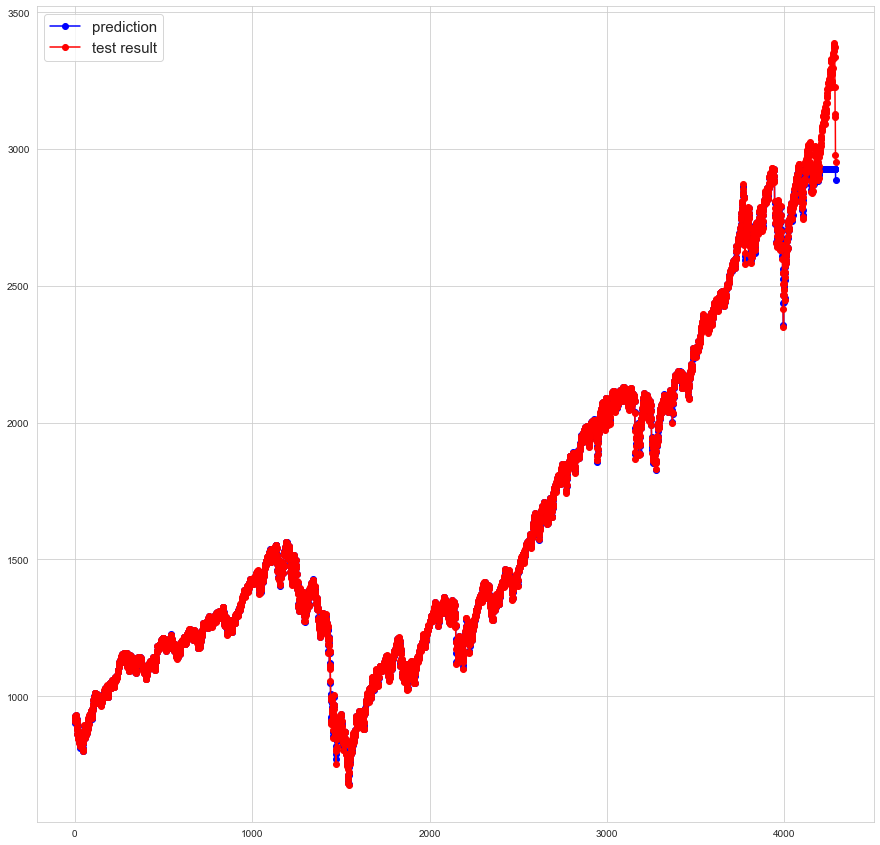

In [94]:
#make prediction and compare it with the y value in testing data
y_pred = my_rfg.predict(df[['Open','High','Low']])
plt.figure(figsize=(15,15))
plt.plot(range(len(y_pred)),y_pred,'b-o',label="prediction")
plt.plot(range(len(df.y)),df.y,'r-o',label="test result")
plt.legend(fontsize =15)
plt.show()

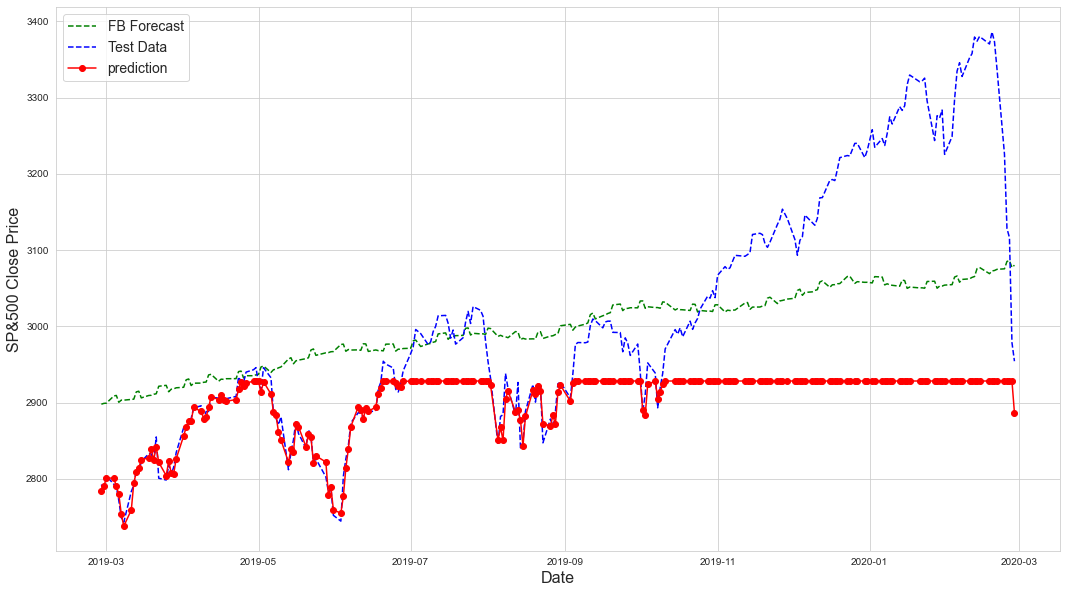

In [104]:
plt.figure(figsize=(18,10))

# # plot the forecast
plt.plot(df_test.ds, forecast[cutoff:].yhat,'g--', label = "FB Forecast")

plt.plot(df_test.ds, df_test.y,'b--', label = "Test Data")

plt.plot(df_test.ds , y_pred[cutoff:],'r-o',label="prediction")

# plt.plot(df_test.ds ,df.y,'r-o',label="test result")

plt.legend(fontsize=14)

plt.xlabel("Date", fontsize=16)
plt.ylabel("SP&500 Close Price", fontsize=16)

plt.show()

In [105]:
from sklearn.metrics import mean_squared_error as MSE

mse_test1 = MSE(df_test.y, y_pred[cutoff:])
mse_test2 = MSE(df_test.y, forecast[cutoff:].yhat)

print(mse_test1,mse_test2)

29736.970587013886 15247.912341091069
